# **Final Project: Spatial Analysis with Python**

**Introduction**

Landscape ecology is an interdisciplinary field that focuses on the patterns, processes, and changes occurring in landscapes, and how these affect ecological functions and biodiversity. It examines how different land uses, land covers, and natural features interact across scales ([Turner, 2005](https://www.annualreviews.org/content/journals/10.1146/annurev.ecolsys.36.102003.152614)). The concept of spatial patterns, such as the physical forms and arrangement of certain landscape features within the landscape matrix, is crucial and may involve forests, rivers, urban areas, and agricultural fields. Furthermore, ecological processes need to be considered, such as species dispersal, nutrient cycling, and habitat connectivity. Landscape ecology emerged in response to increasing human impacts on natural systems and analyses the importance of spatial scale, interactions between spatial patterns and processes, and landscape heterogeneity ([Wu, 2013](https://link.springer.com/article/10.1007/s10980-013-9894-9)). Understanding these dynamics is essential for managing ecosystems in an era of rapid land use change and biodiversity loss.

A key component in landscape ecology is the use of image analysis, particularly through remote sensing technologies such as satellite imagery and aerial photography with commercial drones etc. Image analysis involves processing and interpreting remotely sensed data to extract relevant information about land cover types, vegetation health, water bodies, urban growth, and other landscape features. Advanced image classification methods, such as supervised and unsupervised classification, object-based image analysis (OBIA), and machine learning algorithms, allow for the mapping and monitoring of landscapes over large spatial and temporal scales and with high accuracy. This enables the detection of changes such as deforestation, urban expansion, or wetland degradation, which are critical for ecological monitoring and decision-making ([Campbell and Wynne, 2011](https://www.researchgate.net/publication/258811559_Introduction_to_Remote_Sensing_Fifth_Edition_Edited_by_JamesB_Campbell_and_Randolph_H_Wynne_The_Guilford_Press_2011_662_pages_Price_8075_ISBN_978-1-60918-176-5)).

Closely tied to image analysis is the spatial analysis of landscape features, which involves the quantitative assessment of spatial patterns and relationships in geographic space. Here, measuring landscape metrics, such as patch size, edge density, connectivity, fragmentation and many more aids in the assessment and characterisation of landscape structure and provides insights into ecological processes. For example, fragmented landscapes with small, isolated patches may negatively impact species movement and genetic diversity, while connected landscapes support greater ecological resilience ([McGarigal et al., 2015](https://www.researchgate.net/profile/Samuel-Cushman-2/publication/259011515_FRAGSTATS_Spatial_pattern_analysis_program_for_categorical_maps/links/564217ea08aebaaea1f8b8dd/FRAGSTATS-Spatial-pattern-analysis-program-for-categorical-maps.pdf)).


**Proposal**

In this project, we propose a hypothetical landscape of three classes of interest. This is a comparatively low number of classes but may be suitable for highly complex systems where different groups need to be grouped together as distinction is impossible. Let's imagine a patch of tropical coral reef. Since space on tropical coral reefs is highly fought for by marine organisms, the underlying substrate will almost always be covered by living individuals. In a reef system our general classes of interest will be calcifying coral (here, class 1), algae (here, class 2), and other organisms such as soft coral and other invertebrates (here, class 3). In the following, we create a data set, that is made up of these three classes with hypothetical sizes and perimeters of each object and a binomial response to a disturbance event. This response is: organism/object died due to disturbance or not.

## 1 Creating data
    All data is completely invented and randomly computed.
    A landscape is created made up of three clases of interest.
        Class 1 is our primary class (e.g. live substrate of our species of study).
        Class 2 is our secondary class (e.g. live substrate of a common landscape feature).
        Class 3 is our tertiary class (e.g. live substrate of another common landscape feature).
        NOTE: Class 2 and 3 compose the landscape matrix.
    IMPORTANT! Since all data is randomly computed, outcomes will always differ slightly.

In [32]:
# Importing packages
import random
import csv
import math

# Creating column names
header_col1='true_class'
header_col2='predicted_class'
header_col3='size_cm2'
header_col4='perimeter_cm'
header_col5='died'

# Deciding in total number of data points/objects within a hypothetical landscape
n=100

# Randomly computing class dependencies of each data point (= true class) and those of the predicted class in a hypothetical image classification
col1=[random.randint(1,3) for _ in range(n)]
col2=[]
indices=list(range(n))
random.shuffle(indices)
same_indices=set(indices[:75]) # An automatic agreement of 75 % was decided on

for i in range(n):
    if i in same_indices:
        col2.append(col1[i])
    else:
        col2.append(random.randint(1, 3)) # Randomly computing class dependencies of remaining 25 % of data points

# Randomly computing sizes of each object (min and max size were set at 1 and 100 cm2, respectively)
col3 = [random.randint(1, 100) for _ in range(n)]

# Randomly computing perimeters of each object (max perimeter was set at 200 cm)
col4=[]
for size in col3:
    min_perimeter = max(4, int(4 * math.sqrt(size))) # min perimeter in accordance with the size of an object to avoid illogical data values
    if min_perimeter > 200:
        min_perimeter = 200
    perimeter = random.randint(min_perimeter, 200)
    col4.append(perimeter)

# Randomly deciding on the 'fate' of each object where 25 % of a hypothetical population died and 75 % survived (e.g. due to environmental disturbance)
col5=['yes']*25+['no']*75
random.shuffle(col5)

# Adding data to csv file
rows = zip(col1, col2, col3, col4, col5)
path='C:\\Users\\larab\\OneDrive\\Desktop\\Clase_proyecto\\FinalProject_LaraVirginiaBirkart\\confusion_matrix_data.csv'
with open(path, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow([header_col1, header_col2, header_col3, header_col4, header_col5])
    writer.writerows(rows)

## 2 Confusion matrix
    A landscape (or rather image of a landscape) can be classified through an array of classification methodologies, choosing between a pixel-based vs object-based, a supervised vs
    non-supervised approach, and an array of classification algorythms. Regardless of the methodology chosen, image classifications are commonly verified through the confusion matrix.
    If the landscape is relatively small (as is the case here), all objects can be verified in terms of the algorithms accuracy to classify it.
    The higher the overall accuray (0 -> 100 %) and kappa value (0 -> 1), the higher the level of agreement between the true class(es) of the object(s) and the interpretation by the
    classification algorythm.

Confusion Matrix:
 [[23  3  3]
 [ 1 28  3]
 [ 4  3 32]]
Overall Accuracy: 0.8300
Kappa = 0.743
Substantial agreement.


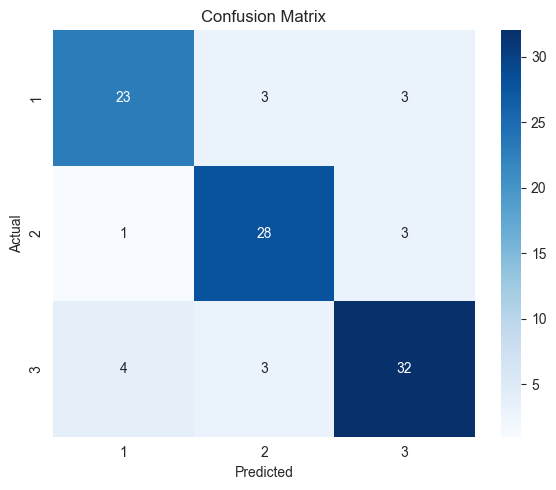

In [33]:
# Importing packages
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, cohen_kappa_score
import seaborn as sns
import matplotlib.pyplot as plt

# Calculating overall accuracy and kappa index
df_confusion_matrix = pd.read_csv(path)
true=df_confusion_matrix['true_class']
predicted=df_confusion_matrix['predicted_class']
cm = confusion_matrix(true, predicted)
accuracy = accuracy_score(true, predicted)
kappa = cohen_kappa_score(true, predicted)

print("Confusion Matrix:\n", cm)
print(f"Overall Accuracy: {accuracy:.4f}")
kappa_interpretation= (
    "Perfect agreement." if kappa == 1 else
    "Near perfect agreement." if kappa >= 0.81 else
    "Substantial agreement." if kappa >= 0.61 else
    "Moderate agreement." if kappa >= 0.41 else
    "Fair agreement." if kappa >= 0.21 else
    "Slight agreement." if kappa >= 0.10 else
    "No agreement."
)
print(f"Kappa = {kappa:.3f}\n{kappa_interpretation}")

# Visualising Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(true), yticklabels=np.unique(true))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

### *References*
Cohen's Kappa Index Interpretation
[Statology](https://www.statology.org/cohens-kappa-statistic/)

## 3 Size and perimeter exploration
    NOTE: Since the data is randomly created, no logical relationship between sizes and perimeters is expected.
    Hence, the following (point 3) is for purely pedgogical purposes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   true_class       100 non-null    int64 
 1   predicted_class  100 non-null    int64 
 2   size_cm2         100 non-null    int64 
 3   perimeter_cm     100 non-null    int64 
 4   died             100 non-null    object
dtypes: int64(4), object(1)
memory usage: 4.0+ KB
None


<Axes: >

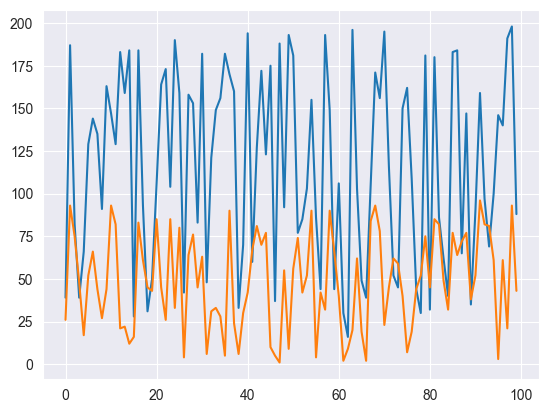

In [34]:
print(df_confusion_matrix.info())
sizes=df_confusion_matrix['size_cm2']
perimeters=df_confusion_matrix['perimeter_cm']
perimeters.plot()
sizes.plot()

In [35]:
sum3=0
for size in col3:
    sum3+=size
average_size=sum3/n
print(f'Average size: {average_size}\nMaximum size: {max(col3)}\nMinimum size: {min(col3)}')

sum4=0
variance_sum4=0
for perim in col4:
    sum4+=perim
average_perim=sum4/n
for perim in col4:
    variance_sum4+=(perim-average_perim)**2
variance=variance_sum4/n
print(f'Average perimeter: {average_perim}\nMaximum perimeter: {max(col4)}\nMinimum perimeter: {min(col4)}')

print('\nAverage size and perimeter by class with standard deviation')
variables=['size_cm2', 'perimeter_cm']
result1=df_confusion_matrix.groupby(['predicted_class'])[variables].agg(['mean','std']).reset_index()
print(result1)


Average size: 48.43
Maximum size: 96
Minimum size: 1
Average perimeter: 116.91
Maximum perimeter: 198
Minimum perimeter: 16

Average size and perimeter by class with standard deviation
  predicted_class   size_cm2            perimeter_cm           
                        mean        std         mean        std
0               1  50.750000  32.556077   136.750000  50.587383
1               2  39.441176  25.735474   106.382353  58.237245
2               3  54.763158  24.986952   111.710526  55.110654


### *3.1 Histogram*

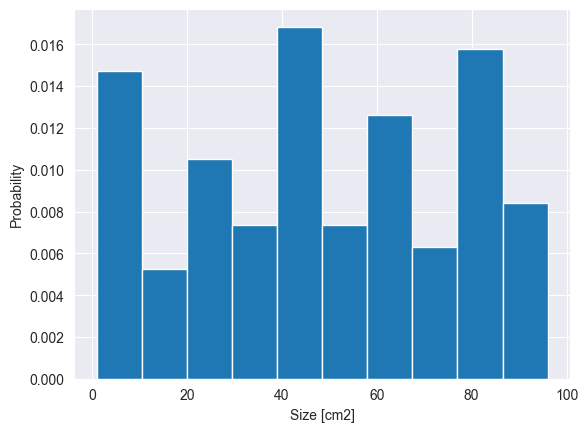

In [36]:
import matplotlib.pyplot as plt
plt.hist(sizes,bins=10,density=True)
plt.xlabel('Size [cm2]')
plt.ylabel('Probability')
plt.show()

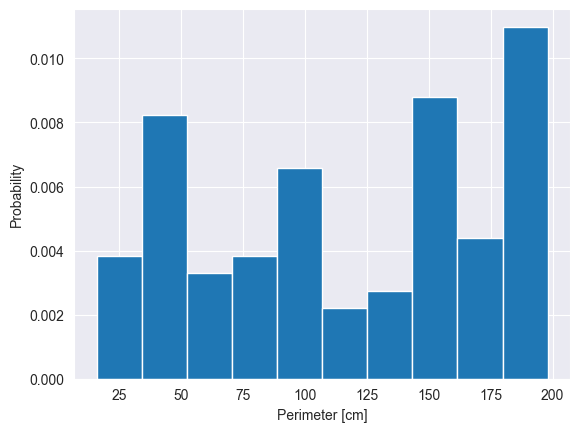

In [37]:
plt.hist(perimeters,bins=10,density=True)
plt.xlabel('Perimeter [cm]')
plt.ylabel('Probability')
plt.show()

### *3.2 Boxplot*

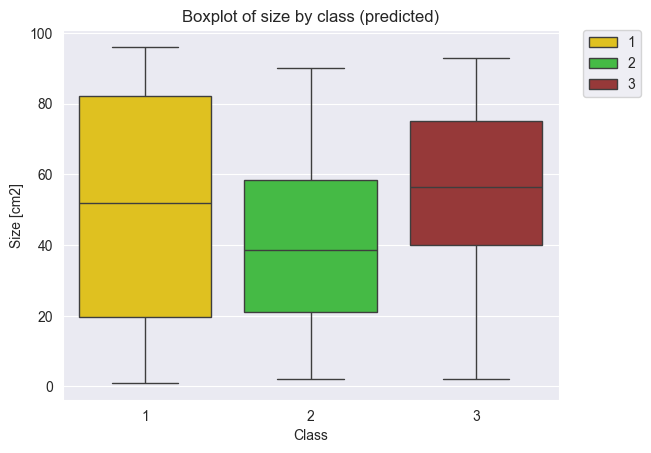

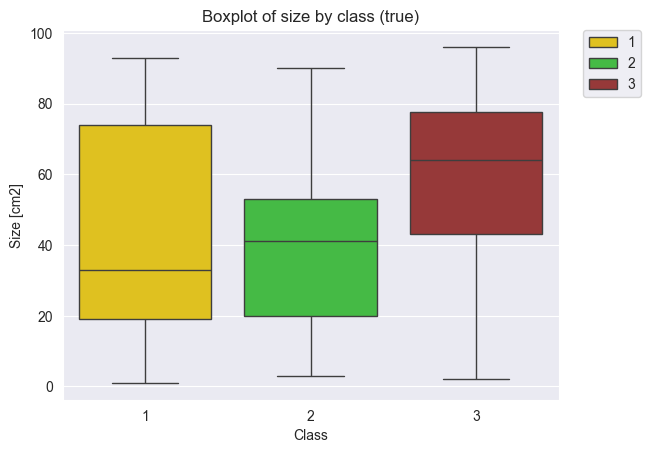

In [38]:
my_colors=['gold','limegreen','brown']
sns.boxplot(x='predicted_class',y='size_cm2',data=df_confusion_matrix,hue='predicted_class',palette=my_colors)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Class')
plt.ylabel('Size [cm2]')
plt.title('Boxplot of size by class (predicted)')
plt.show()

sns.boxplot(x='true_class',y='size_cm2',data=df_confusion_matrix,hue='true_class',palette=my_colors)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Class')
plt.ylabel('Size [cm2]')
plt.title('Boxplot of size by class (true)')
plt.show()

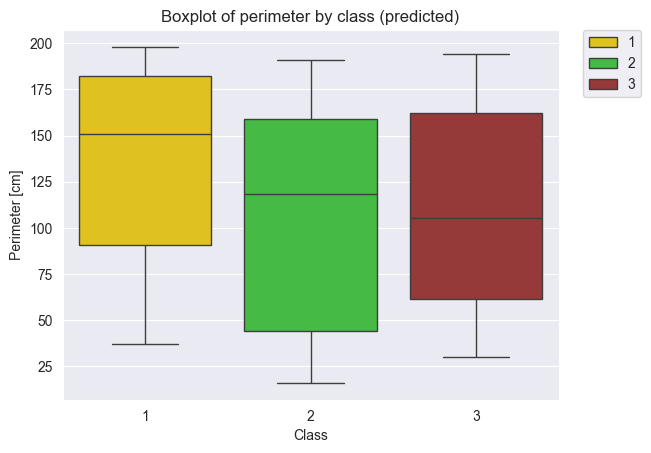

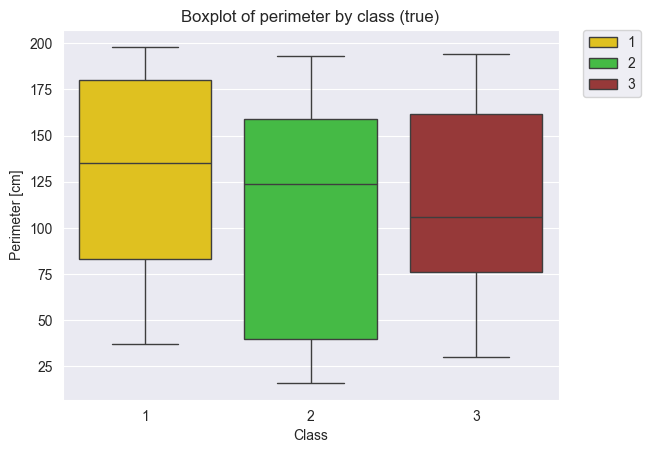

In [39]:
sns.boxplot(x='predicted_class',y='perimeter_cm',data=df_confusion_matrix,hue='predicted_class',palette=my_colors)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Class')
plt.ylabel('Perimeter [cm]')
plt.title('Boxplot of perimeter by class (predicted)')
plt.show()

sns.boxplot(x='true_class',y='perimeter_cm',data=df_confusion_matrix,hue='true_class',palette=my_colors)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Class')
plt.ylabel('Perimeter [cm]')
plt.title('Boxplot of perimeter by class (true)')
plt.show()

### *3.3 Kruskal-Wallis test*

In [40]:
# Size differences between classes
from scipy.stats import kruskal
def kruskal_wallis_test(*groups, alpha=0.05):
    result2=kruskal(*groups)
    print(f"H statistic = {result2.statistic}; p-value = {result2.pvalue}")
    if result2.pvalue < alpha:
        print("The difference between groups IS statistically significant.")
    else:
        print("The difference between groups is NOT statistically significant.")

import scikit_posthocs as sp
def dunn_posthoc(data, group_col, value_col, p_adjust='bonferroni'):
    result2 = sp.posthoc_dunn(data, val_col=value_col, group_col=group_col, p_adjust=p_adjust)
    print(result2)
    return result2

kw_class1_s=df_confusion_matrix[df_confusion_matrix['true_class']==1]['size_cm2']
kw_class2_s=df_confusion_matrix[df_confusion_matrix['true_class']==2]['size_cm2']
kw_class3_s=df_confusion_matrix[df_confusion_matrix['true_class']==3]['size_cm2']
kruskal_wallis_test(kw_class1_s, kw_class2_s, kw_class3_s)
dunn_posthoc(df_confusion_matrix,'predicted_class','size_cm2')

H statistic = 11.771330652613157; p-value = 0.0027789966705243124
The difference between groups IS statistically significant.
          1         2         3
1  1.000000  0.327325  1.000000
2  0.327325  1.000000  0.081083
3  1.000000  0.081083  1.000000


,1,2,3
1,1.000000,0.327325,1.000000
2,0.327325,1.000000,0.081083
3,1.000000,0.081083,1.000000


In [41]:
# Perimeter differences between classes
from scipy.stats import kruskal
def kruskal_wallis_test(*groups, alpha=0.05):
    result2=kruskal(*groups)
    print(f"H statistic = {result2.statistic}; p-value = {result2.pvalue}")
    if result2.pvalue < alpha:
        print("The difference between groups IS statistically significant.")
    else:
        print("The difference between groups is NOT statistically significant.")

import scikit_posthocs as sp
def dunn_posthoc(data, group_col, value_col, p_adjust='bonferroni'):
    result2 = sp.posthoc_dunn(data, val_col=value_col, group_col=group_col, p_adjust=p_adjust)
    print(result2)
    return result2

kw_class1_p=df_confusion_matrix[df_confusion_matrix['true_class']==1]['perimeter_cm']
kw_class2_p=df_confusion_matrix[df_confusion_matrix['true_class']==2]['perimeter_cm']
kw_class3_p=df_confusion_matrix[df_confusion_matrix['true_class']==3]['perimeter_cm']
kruskal_wallis_test(kw_class1_p, kw_class2_p, kw_class3_p)
dunn_posthoc(df_confusion_matrix,'predicted_class','perimeter_cm')

H statistic = 1.871312127034666; p-value = 0.39232838873752335
The difference between groups is NOT statistically significant.
          1         2         3
1  1.000000  0.075629  0.204204
2  0.075629  1.000000  1.000000
3  0.204204  1.000000  1.000000


,1,2,3
1,1.000000,0.075629,0.204204
2,0.075629,1.000000,1.000000
3,0.204204,1.000000,1.000000


### *3.4 Linear regression: Size vs perimeter*

slope = 0.38768234629985365, intercept = 98.13454396869808, r = 0.19470930722985705, r2 = 0.03791171432193086, p_value = 0.05222972480269832


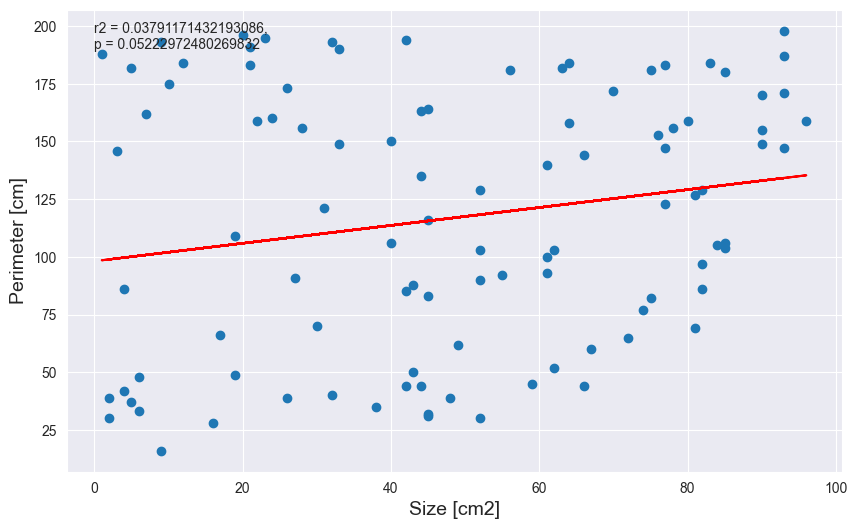

In [42]:
from scipy import stats
plt.scatter(sizes,perimeters,label='Size Perimeter Relationship')
plt.xlabel('Size [cm2]',fontsize=14)
plt.ylabel('Perimeter [cm]',fontsize=14)
slope,intc,rval,pval,sterr=stats.linregress(sizes,perimeters)
print(f'slope = {slope}, intercept = {intc}, r = {rval}, r2 = {rval*rval}, p_value = {pval}')
plt.plot(sizes,intc+slope*sizes,'r',label='fitted line')
plt.gcf().set_size_inches(10,6)
plt.annotate(f'r2 = {rval*rval},\np = {pval}',xy=(0,190),fontsize=10)
plt.show()

## 4 Landscape ecology metrics for spatial analysis

This part is probably the most interesting one. Landscape features have several key characteristics including their size, perimeter, geographical location in relation to each other and many more. In the following, we explore a few landscape metrics for our hypothetical data set. Since our primary class of interest is calcifying coral (class 1), most landscape metrics were calculated for this class within the landscape matrix which is made up of classes 2 and 3.

### 4.1 Cohesion

In [43]:
# Calculating the Cohesion index for our class of interest (class 1) within its landscape.
pred_class=df_confusion_matrix['true_class']
perim_sum=0
var_sum=0
landscape_area=sum(col3)
print(f'Landscape area: {landscape_area} cm2')

with open(path, 'r') as file:
    reader=csv.DictReader(file)
    for i,row in enumerate(reader):
        if pred_class.iloc[i]!=1:
            continue
        else:
            size=int(row['size_cm2'])
            perimeter=int(row['perimeter_cm'])
            var=perimeter*math.sqrt(size)
            perim_sum+=perimeter
            var_sum+=var
    CohInd=(1-(perim_sum/(var_sum)))*(math.pow((1-(1/math.sqrt(landscape_area))),(-1)))*(100)

print(f'Landscape cohesion index: {CohInd:.3f}')


Landscape area: 4843 cm2
Landscape cohesion index: 84.409


### 4.2 Patch density

In [44]:
# Calculating the patch density of our class of interest (class 1) within its landscape.
no_patches=0
with open(path, 'r') as file:
    reader=csv.DictReader(file)
    for i,row in enumerate(reader):
        if pred_class.iloc[i]!=1:
            continue
        else:
            no_patches+=1
    PD=no_patches/landscape_area*10000
    print(f'Patch density: {PD} patches per m2')

Patch density: 59.880239520958085 patches per m2


### 4.3 Landscape division index

In [45]:
# Calculating the Landscape division index for our class of interest (class 1) within its landscape.
ldi_sum=0
with open(path, 'r') as file:
    reader=csv.DictReader(file)
    for i,row in enumerate(reader):
        if pred_class.iloc[i]!=1:
            continue
        else:
            size=int(row['size_cm2'])
            ldi=size/landscape_area
            ldi_sum+=ldi
    LDI=(1-math.pow((ldi_sum),(2)))
    print(f'Landscape division index: {LDI}')

Landscape division index: 0.9385025544402732


### 4.4 Splitting index

In [46]:
# Calculating the Splitting index for our class of interest (class 1) within its landscape.
size_sum=0
with open(path, 'r') as file:
    reader=csv.DictReader(file)
    for i,row in enumerate(reader):
        if pred_class.iloc[i]!=1:
            continue
        else:
            size=int(row['size_cm2'])
            size_sum+=size
    SPLIT=(math.pow((landscape_area),(2)))/(math.pow((size_sum),(2)))
    print(f'Splitting index: {SPLIT}')

Splitting index: 16.260838005519965


### 4.6 Effective mesh size

In [47]:
# Calculating the Effective mesh size of our class of interest (class 1) within its landscape.
size_sum=0
with open(path, 'r') as file:
    reader=csv.DictReader(file)
    for i,row in enumerate(reader):
        if pred_class.iloc[i]!=1:
            continue
        else:
            size=int(row['size_cm2'])
            size_sum+=size
    MESH=(math.pow((size_sum),(2)))/(landscape_area)*10000
    print(f'Effective mesh size: {MESH} m2')

Effective mesh size: 2978321.2884575673 m2


### 4.7 Shannon's and Simpson's diversity and evenness index

In [48]:
# Calculating Shannon's and Simpson's diversity and evenness index of our hypothetical community with three classes.
class1=0
class2=0
class3=0
with open(path, 'r') as file:
    reader = csv.DictReader(file)
    for i, row in enumerate(reader):
        if pred_class.iloc[i]==1:
            class1+=1
        elif pred_class.iloc[i]==2:
            class2+=1
        else:
            class3+=1
    proportion1=class1/n
    proportion2=class2/n
    proportion3=class3/n
    SHDI=-((proportion1*math.log(proportion1,10))+(proportion2*math.log(proportion2,10))+(proportion3*math.log(proportion3,10)))
    SIDI=(1-(math.pow(proportion1,2)+math.pow(proportion2,2)+math.pow(proportion3,2)))
    SHEI=-((proportion1*math.log(proportion1,10))+(proportion2*math.log(proportion2,10))+(proportion3*math.log(proportion3,10)))/math.log(3,10)
    SIEI=(1-(math.pow(proportion1,2)+math.pow(proportion2,2)+math.pow(proportion3,2)))/(1-(1/3))
    print(f'Shannons Diversity Index: {SHDI}')
    print(f'Simpsons Diversity Index: {SIDI}')
    print(f'Shannons Evenness Index: {SHEI}')
    print(f'Simpsons Evenness Index: {SIEI}')

Shannons Diversity Index: 0.4737413908065981
Simpsons Diversity Index: 0.6614
Shannons Evenness Index: 0.9929161321579559
Simpsons Evenness Index: 0.9920999999999999


### *References*
Formulae for landscape metrics were obtained from
[Fragstats](https://www.researchgate.net/profile/Samuel-Cushman-2/publication/259011515_FRAGSTATS_Spatial_pattern_analysis_program_for_categorical_maps/links/564217ea08aebaaea1f8b8dd/FRAGSTATS-Spatial-pattern-analysis-program-for-categorical-maps.pdf)

## 5 Population fate

Now, our landscape features suffered from an environmental disturbance event where each object/feature either survived or died. We have previously established that 25 % of our features suffered from mortality and 75 % survived. Important to mention, objects and their fate were chosen randomly, as such, again, no logical relationship is expected between the event and the landscape characteristics. Nonetheless, analysis were performed for educational purposes and out of interest.

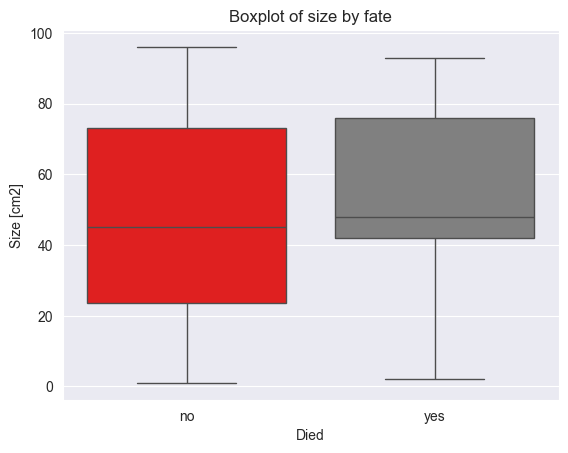

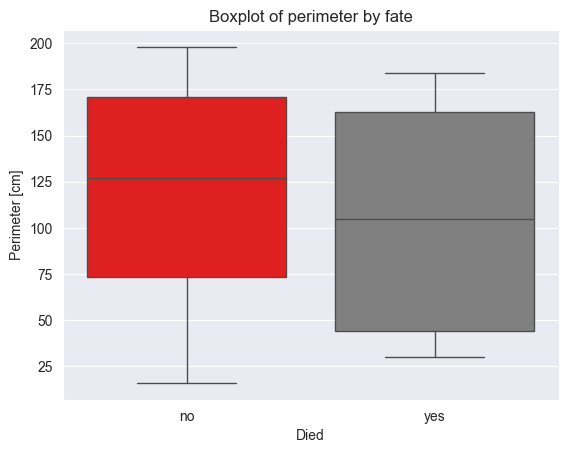

In [49]:
my_colors2=['red','grey']
sns.boxplot(x='died',y='size_cm2',data=df_confusion_matrix,hue='died',palette=my_colors2)
plt.xlabel('Died')
plt.ylabel('Size [cm2]')
plt.title('Boxplot of size by fate')
plt.show()

sns.boxplot(x='died',y='perimeter_cm',data=df_confusion_matrix,hue='died',palette=my_colors2)
plt.xlabel('Died')
plt.ylabel('Perimeter [cm]')
plt.title('Boxplot of perimeter by fate')
plt.show()

### 5.1 Binomial GLM

### *5.1.1 Size and fate*

In [50]:
import statsmodels.api as sm

df_glm=df_confusion_matrix
df_glm['y']=df_confusion_matrix['died'].map({'yes':1,'no':0})
y=df_glm['y']
x_size=sm.add_constant(df_confusion_matrix['size_cm2'])

model = sm.GLM(y, x_size, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -56.039
Date:                Tue, 09 Sep 2025   Deviance:                       112.08
Time:                        13:40:49   Pearson chi2:                     100.
No. Iterations:                     4   Pseudo R-squ. (CS):           0.003877
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3544      0.480     -2.824      0.0

### *5.1.2 Perimeter and fate*

In [51]:
x_perim=sm.add_constant(df_confusion_matrix['perimeter_cm'])

model = sm.GLM(y, x_perim, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -55.795
Date:                Tue, 09 Sep 2025   Deviance:                       111.59
Time:                        13:40:49   Pearson chi2:                     100.
No. Iterations:                     4   Pseudo R-squ. (CS):           0.008729
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.6560      0.517     -1.270   

**Conclusions**

Spatial analysis is a promising and interesting field for which Python provides many possibilities. Since our data was randomly created, the direct results/outcomes have no real value. Nevertheless, associated calculi and codes can be applied to real data to explore size-shape-response relationships and mechanisms of real landscapes and seascapes such as coral reefs.